<h3>DASC 2113 - Midterm</h3>

<h3>Goal</h3>

For this midterm exam you will conduct an exploratory data analysis on the relationship between arrest records from the New York City Police Department and population demographics for two boroughs, Brooklyn and Manhattan. You will need to answer the following question:

<b><i>How do the arrest demographics for drug and alcohol-related offenses compare to the corresponding population demographics for each borough? </i></b>

This question can be broken into several components: 
<ul>
    <li>Extract drug and alcohol-related arrests from the NYPD data. The attribute to determine arrest type is <i>ofns_desc</i>. Drug and alcohol-related arrests for the purpose of this exam are: <i>"DANGEROUS DRUGS"</i> and <i>"INTOXICATED & IMPAIRED DRIVING"</i>.</li><br>
     <li>The extracted arrest records can then be used with population data to examine how the number of extracted arrests overall and for particular age groups compare to that borough's population.</li>

<h3> Data Sources</h3>
Your are required to use the 3 datasets listed below: 

<ol>
    <li><a href = "https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc">NYPD Arrest Data (Year to Date)</a></li>
    <li><a href = "https://data.cityofnewyork.us/City-Government/Projected-Population-2010-2040-Total-By-Age-Groups/97pn-acdf
        ">City Government Projected Population 2010-2040 Total by Age Group</a></li>
    <li>Borough Names - A csv file contaning the <i>code</i> used in the <a href = "https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc">NYPD Arrest Data</a> for each borough and the <i>name</i> for that borough.</li>
</ol>

The <b><i>NYPD Arrest Data</i></b> contains a daily arrest log for the 2021 year. You will only work with a small subset of this arrest log for the first week in January. Attributes that may be useful in your analysis are: <i>ofns_desc, arrest_boro, and age_group</i>. The data type and description of each of these attributes is available from the above link .

The <b><i>City Government Projected Population 2010-2040 Total by Age Group</i></b> table contains demographic <b><i>(population)</i></b> data for each of the 5 boroughs and NYC as a whole. 

The <b><i>Borough Names</i></b> dataset is a csv file that contains data to decode a borough's <i>name</i> from it's NYPD Arrest data <i>code</i>. 

<h3>Requirements</h3>
<h4><u>General</u></h4>
<ul>
    <li>You must submit all code used to complete the midterm exam. A csv or json file of the NYPD Arrest data you used in this exam must also be submitted.</li><br>
    <li>The midterm exam must be completed individually. You may not work on it in groups or discuss the contents of the exam with others. All work submitted should be your own.</li><br>
    <li>You are allowed to use resources from this course and DataCamp on the exam. You may also use external resources, i.e. API documentation, Google or StackOverflow, but should cite any use of external resources as a comment above the code it corresponds to. </li><br>
    <li>Certain portions of the midterm exam have specific requirements such as particular methods, functions, and concepts that must be used in your code. You must follow these specific requirements, even if there may be a different way to achieve the same solution.</li>


</ul>
<h4><u>Data Acquisition and Cleaning</u></h4>
<ul>
    <li>You are may, but are not required, to access the NYPD Arrest data by using the <b><i>Socrata Open Data API (SODA)</i></b>. The endpoint for the <b><i>NYPD Arrest data</i></b> is https://data.cityofnewyork.us/resource/uip8-fykc . More specific instructions on the SODA API query will be given in its section.</li><br>
    <li>The data in the provided files has already been tidied, however you may still need to do additional pre-processing after importing before you can conduct an exploratory analysis.</li>
    
</ul>
<h4><u>Exploratory Data Analysis</u></h4>
<ul>
<li>You should include all appropriate components of an exploratory data analysis including decriptive statistics and visualizations/plots. All plots and visualizations should include: title, x & y-axes labels, and if needed, a legend.</li><br>
    <li>More specific instructions including which plots to use and which attributes to examine, will be given in the sections below.</li>
</ul>

<h4><u>What to Turn in</u></h4>
<ol>
    <li>The code you used to complete this exploratory analysis.</li><br>
    <li>Your answer to the question: <b><i>How do the arrest demographics for drug and alcohol-related offenses compare to the corresponding population demographics for each borough?</i></b></li><br>
    <li>The NYPD arrest data you requested using the SODA API saved as either a csv or json file.</li>
        
</ol>

<h4><u>Import libraries</u></h4>

Import the libraries you will use. 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns
import geopandas as gpd

<h4><u>NYPD Arrest Data using Socrata Open Data API</u></h4>

In this section, you will need to use the Socrata Open Data API (SODA) to request data for Brooklyn and Manhattan. These boroughs can be specified by the attribute <i>arrest_boro</i> using the values 'K' for Brooklyn and 'M' for Manhattan. The endpoint for this data is: https://data.cityofnewyork.us/resource/uip8-fykc 

Make a separate request to the API for each borough. Return only the first 300 rows by specifying LIMIT 300 at the end of each request. 

Combine the results of your two requests to the API into a single DataFrame. Save the DataFrame to a csv file. 

You may also access this data via download, but the preferred method is to use the API.

In [135]:
# API was not an optino for me with the certificate issues, I later limit the df to 300
arrest_df = pd.read_csv("NYPD_Arrest_Data.csv", sep = ",", on_bad_lines = "warn")
print(arrest_df.head())

   ARREST_KEY ARREST_DATE  PD_CD PD_DESC  KY_CD OFNS_DESC    LAW_CODE  \
0   238859078  01/09/2022    NaN  (null)    NaN    (null)  PL 2650022   
1   239923883  01/31/2022    NaN  (null)    NaN    (null)  CPL5700600   
2   239651234  01/25/2022  153.0  RAPE 3  104.0      RAPE  PL 1302503   
3   241524225  03/03/2022  157.0  RAPE 1  104.0      RAPE  PL 1303501   
4   241038267  02/22/2022  157.0  RAPE 1  104.0      RAPE  PL 1303501   

  LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP  \
0          M           B               49                  0     25-44   
1          9           Q              113                  3     25-44   
2          F           K               71                  0     25-44   
3          F           K               84                  0     18-24   
4          F           B               41                  0     45-64   

  PERP_SEX       PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
0        M  BLACK HISPANIC     1021536  

In [136]:
filter_brooklyn = arrest_df["ARREST_BORO"] == "K"
filter_manhattan = arrest_df["ARREST_BORO"] == "M"
B_M_df = arrest_df.where(filter_brooklyn | filter_manhattan)  #https://www.geeksforgeeks.org/python-pandas-dataframe-where/#:~:text=Pandas%20where%20%28%29%20method%20is%20used%20to%20check,other%3Dnan%2C%20inplace%3DFalse%2C%20axis%3DNone%2C%20level%3DNone%2C%20errors%3D%E2%80%99raise%E2%80%99%2C%20try_cast%3DFalse%2C%20raise_on_error%3DNone%29%20Parameters%3A
#print(B_M_df.head(10))
B_M_clean_df = B_M_df.dropna()
print(B_M_clean_df.head(5))
print(B_M_clean_df.shape)

    ARREST_KEY ARREST_DATE  PD_CD           PD_DESC  KY_CD   OFNS_DESC  \
2  239651234.0  01/25/2022  153.0            RAPE 3  104.0        RAPE   
3  241524225.0  03/03/2022  157.0            RAPE 1  104.0        RAPE   
5  240817075.0  02/17/2022  175.0  SEXUAL ABUSE 3,2  233.0  SEX CRIMES   
8  243994388.0  04/21/2022  157.0            RAPE 1  104.0        RAPE   
9  245888645.0  06/01/2022  464.0          JOSTLING  230.0    JOSTLING   

     LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
2  PL 1302503          F           K             71.0                0.0   
3  PL 1303501          F           K             84.0                0.0   
5  PL 13052A1          M           K             71.0                0.0   
8  PL 1303501          F           K             77.0                0.0   
9  PL 1652501          M           M             13.0                1.0   

  AGE_GROUP PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
2     25-44       

In [138]:
# set limit where shape returns 300 rows
limit = 593
B_M_300_df = B_M_clean_df.loc[B_M_clean_df.index <= limit] #https://stackoverflow.com/questions/59286779/create-smaller-dataframes-from-a-large-dataframe-using-the-index-values-from-a-l
print(B_M_300_df.shape)
print(B_M_300_df.head())

(300, 19)
    ARREST_KEY ARREST_DATE  PD_CD           PD_DESC  KY_CD   OFNS_DESC  \
2  239651234.0  01/25/2022  153.0            RAPE 3  104.0        RAPE   
3  241524225.0  03/03/2022  157.0            RAPE 1  104.0        RAPE   
5  240817075.0  02/17/2022  175.0  SEXUAL ABUSE 3,2  233.0  SEX CRIMES   
8  243994388.0  04/21/2022  157.0            RAPE 1  104.0        RAPE   
9  245888645.0  06/01/2022  464.0          JOSTLING  230.0    JOSTLING   

     LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
2  PL 1302503          F           K             71.0                0.0   
3  PL 1303501          F           K             84.0                0.0   
5  PL 13052A1          M           K             71.0                0.0   
8  PL 1303501          F           K             77.0                0.0   
9  PL 1652501          M           M             13.0                1.0   

  AGE_GROUP PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
2     25

<h4><u>Decoding Arrest Borough</u></h4>

Use the <b><i>borough_names.csv</i></b> with the DataFrame you created in the step above to decode the <i>arrest_boro</i>. Create a new column in your arrests DataFrame to store the borough's full name. This step <b><i>must be done using a join</i></b>.

In [150]:
borough_names_df = pd.read_csv("borough_names.csv")
borough_names_df["ARREST_BORO"] = borough_names_df['code'] # the columns code and arrest boro in final df are going to be the same, could always get rid of one but no need
#print(borough_names_df.head(15))

Brooklyn_Manhattan_300_df = pd.merge(borough_names_df, B_M_300_df, how = "right", on = "ARREST_BORO")
print(Brooklyn_Manhattan_300_df.head())
print(Brooklyn_Manhattan_300_df.shape)

  code      boro_name ARREST_BORO
0    B          Bronx           B
1    K       Brooklyn           K
2    M      Manhattan           M
3    Q         Queens           Q
4    S  Staten Island           S
  code  boro_name ARREST_BORO   ARREST_KEY ARREST_DATE  PD_CD  \
0    K   Brooklyn           K  239651234.0  01/25/2022  153.0   
1    K   Brooklyn           K  241524225.0  03/03/2022  157.0   
2    K   Brooklyn           K  240817075.0  02/17/2022  175.0   
3    K   Brooklyn           K  243994388.0  04/21/2022  157.0   
4    M  Manhattan           M  245888645.0  06/01/2022  464.0   

            PD_DESC  KY_CD   OFNS_DESC    LAW_CODE  ... ARREST_PRECINCT  \
0            RAPE 3  104.0        RAPE  PL 1302503  ...            71.0   
1            RAPE 1  104.0        RAPE  PL 1303501  ...            84.0   
2  SEXUAL ABUSE 3,2  233.0  SEX CRIMES  PL 13052A1  ...            71.0   
3            RAPE 1  104.0        RAPE  PL 1303501  ...            77.0   
4          JOSTLING  230.0    

<h4><u>Drug and alcohol-related arrests</u></h4>

Create a new DataFrame containing only the drug and alcohol-related arrests: <i>"DANGEROUS DRUGS" and "INTOXICATED & IMPAIRED DRIVING" </i>. Use the <i>ofns_desc</i> attribute for this. 

In your newly created DataFrame, create a new column called <i>ofns_label</i>. If the value of <i>onfs_desc</i> is equal to <i>DANGEROUS DRUGS</i> then the value in <i>ofns_label</i> should be <i>DD</i>. If the value of <i>onfs_desc</i> is <i>INTOXICATED & IMPAIRED</i> then the value of <i>ofns_label</i> should be <i>II</i>.

You will use this DataFrame containing only the drug and alcohol-related arrests for the rest of this exam. 


In [148]:
filter_drugs = arrest_df["OFNS_DESC"] == "DANGEROUS DRUGS"
filter_driving = arrest_df["OFNS_DESC"] == "INTOXICATED & IMPAIRED DRIVING"
drug_driving_arrests_df = arrest_df.where(filter_drugs | filter_driving)
drug_driving_arrests_clean_df = drug_driving_arrests_df.dropna()
print(drug_driving_arrests_clean_df.head(10))
print(drug_driving_arrests_clean_df.shape)

      ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
55   242964092.0  04/02/2022  905.0     INTOXICATED DRIVING,ALCOHOL  347.0   
72   240173187.0  02/06/2022  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
113  240889888.0  02/18/2022  503.0  CONTROLLED SUBSTANCE,INTENT TO  117.0   
131  244898439.0  05/11/2022  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
137  243549959.0  04/12/2022  532.0   CONTROLLED SUBSTANCE,POSSESS.  117.0   
148  239634559.0  01/25/2022  905.0     INTOXICATED DRIVING,ALCOHOL  347.0   
161  240079716.0  02/03/2022  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
192  246051460.0  06/03/2022  508.0  DRUG PARAPHERNALIA,   POSSESSE  235.0   
214  242411038.0  03/21/2022  905.0     INTOXICATED DRIVING,ALCOHOL  347.0   
221  241918225.0  03/10/2022  905.0     INTOXICATED DRIVING,ALCOHOL  347.0   

                          OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
55   INTOXICATED & IMPAIRED DRIVING  VTL11920U3          M         

In [332]:
# here i create the label column
drug_driving_arrests_clean_df["OFNS_LABEL"] = np.where(drug_driving_arrests_clean_df['OFNS_DESC']=="DANGEROUS DRUGS", 'DD', 'II')
print(drug_driving_arrests_clean_df['OFNS_LABEL'].head(20))

55     II
72     DD
113    DD
131    DD
137    DD
148    II
161    DD
192    DD
214    II
221    II
227    II
276    DD
279    DD
309    DD
310    DD
312    DD
363    II
364    DD
378    DD
391    DD
Name: OFNS_LABEL, dtype: object


/var/folders/8h/nv17cfxn1vsb_k1q_0q9t_jw0000gn/T/ipykernel_74220/1619995317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_driving_arrests_clean_df["OFNS_LABEL"] = np.where(drug_driving_arrests_clean_df['OFNS_DESC']=="DANGEROUS DRUGS", 'DD', 'II')


<h4><u>Drug and alcohol-related arrests Exploratory Analysis</u></h4>

Reminder: You will use the DataFrame containing only the drug and alcohol-related arrests for the rest of this exam. 

For this section you will need to do the following:
<ul>
    <li>Print the number of arrests for each <i>ofns_desc</i> for each borough.</li><br>
    <li>Create a histogram displaying the counts of the types of arrests using <i>ofns_abrv</i> for each borough. Use Matplotlib to do this. </li>
</ul>

In [263]:
print(drug_driving_arrests_clean_df.groupby(["ARREST_BORO"])["PD_DESC"].count())

ARREST_BORO
B    2027
K    2146
M    2983
Q    1655
S     688
Name: PD_DESC, dtype: int64


In [315]:
# create data frame with only drug arrests
drug_arrests_df = arrest_df.where(filter_drugs)
drug_arrests_clean_df = drug_arrests_df.dropna()
drug_arrests_clean_df = drug_arrests_clean_df.sort_values("ARREST_BORO")
#print(drug_arrests_clean_df.head())

# create data frame with only driving arrests
driving_arrests_df = arrest_df.where(filter_driving)
driving_arrests_clean_df = driving_arrests_df.dropna()
driving_arrests_clean_df = driving_arrests_clean_df.sort_values("ARREST_BORO")
#print(driving_arrests_clean_df.head())

# filter for each ARREST_BORO
filter_arrest_boro_B = arrest_df['ARREST_BORO'] == "B"
filter_arrest_boro_K = arrest_df['ARREST_BORO'] == "K"
filter_arrest_boro_M = arrest_df['ARREST_BORO'] == "M"
filter_arrest_boro_Q = arrest_df['ARREST_BORO'] == "Q"
filter_arrest_boro_S = arrest_df['ARREST_BORO'] == "S"

# create subset df for both drugs and driving for each borough
# drug arrests
Bronx_drug_arrests_df = drug_arrests_clean_df.where(filter_arrest_boro_B)
Bronx_drug_arrests_clean_df = Bronx_drug_arrests_df.dropna()
#print(Bronx_drug_arrests_clean_df.head(2))

Brooklyn_drug_arrests_df = drug_arrests_clean_df.where(filter_arrest_boro_K)
Brooklyn_drug_arrests_clean_df = Brooklyn_drug_arrests_df.dropna()
#print(Brooklyn_drug_arrests_clean_df.head(2))

Manhattan_drug_arrests_df = drug_arrests_clean_df.where(filter_arrest_boro_M)
Manhattan_drug_arrests_clean_df = Manhattan_drug_arrests_df.dropna()
#print(Manhattan_drug_arrests_clean_df.head(2))

Queens_drug_arrests_df = drug_arrests_clean_df.where(filter_arrest_boro_Q)
Queens_drug_arrests_clean_df = Queens_drug_arrests_df.dropna()
#print(Queens_drug_arrests_clean_df.head(2))

Staten_Island_drug_arrests_df = drug_arrests_clean_df.where(filter_arrest_boro_S)
Staten_Island_drug_arrests_clean_df = Staten_Island_drug_arrests_df.dropna()
#print(Staten_Island_drug_arrests_clean_df.head(2))


# driving arrests
Bronx_driving_arrests_df = driving_arrests_clean_df.where(filter_arrest_boro_B)
Bronx_driving_arrests_clean_df = Bronx_driving_arrests_df.dropna()
#print(Bronx_driving_arrests_clean_df.head(2))

Brooklyn_driving_arrests_df = driving_arrests_clean_df.where(filter_arrest_boro_K)
Brooklyn_driving_arrests_clean_df = Brooklyn_driving_arrests_df.dropna()
#print(Brooklyn_driving_arrests_clean_df.head(2))

Manhattan_driving_arrests_df = driving_arrests_clean_df.where(filter_arrest_boro_M)
Manhattan_driving_arrests_clean_df = Manhattan_driving_arrests_df.dropna()
#print(Manhattan_driving_arrests_clean_df.head(2))

Queens_driving_arrests_df = driving_arrests_clean_df.where(filter_arrest_boro_Q)
Queens_driving_arrests_clean_df = Queens_driving_arrests_df.dropna()
#print(Queens_driving_arrests_clean_df.head(2))

Staten_Island_driving_arrests_df = driving_arrests_clean_df.where(filter_arrest_boro_S)
Staten_Island_driving_arrests_clean_df = Staten_Island_driving_arrests_df.dropna()
#print(Staten_Island_driving_arrests_clean_df.head(2))

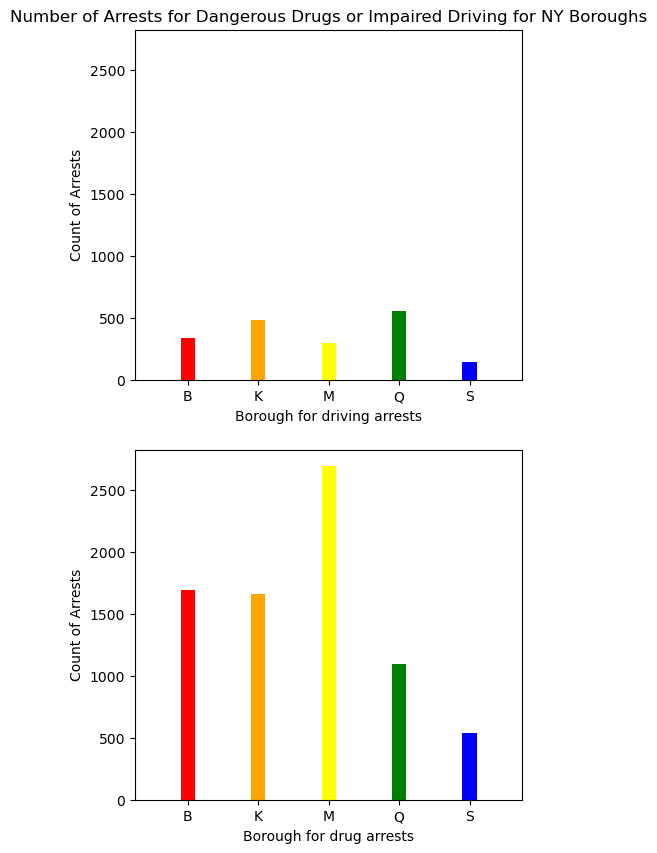

In [330]:
# Define figure and axis
fig, axs = plt.subplots(2,1, figsize = (5,10), sharey = True)


# Set title for axs[0] to use for all subplots 
axs[0].set_title("Number of Arrests for Dangerous Drugs or Impaired Driving for NY Boroughs")

# Set x label for bottom subplot only. 
axs[0].set_xlabel("Borough for driving arrests")
axs[1].set_xlabel("Borough for drug arrests")
axs[0].set_ylabel("Count of Arrests")
axs[1].set_ylabel("Count of Arrests")

# driving arrests
axs[0].hist(Bronx_driving_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Red'], label=['Bronx'])
axs[0].hist(Brooklyn_driving_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Orange'], label=['Brooklyn'])
axs[0].hist(Manhattan_driving_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Yellow'], label=['Manhattan'])
axs[0].hist(Queens_driving_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Green'], label=['Queens'])
axs[0].hist(Staten_Island_driving_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Blue'], label=['Staten Island'])

# drug arrests
axs[1].hist(Bronx_drug_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Red'], label=['Bronx'])
axs[1].hist(Brooklyn_drug_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Orange'], label=['Brooklyn'])
axs[1].hist(Manhattan_drug_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Yellow'], label=['Manhattan'])
axs[1].hist(Queens_drug_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Green'], label=['Queens'])
axs[1].hist(Staten_Island_drug_arrests_clean_df["ARREST_BORO"], bins = 5, color=['Blue'], label=['Staten Island'])

plt.show()

<h4><u>NYC Population Data</u></h4>

Read the population data into a DataFrame using the [Projected_Population_2010-2040_-_Total_By_Age_Groups.xlsx](https://data.cityofnewyork.us/api/views/97pn-acdf/files/28bebd02-1caa-41ec-9e86-195f3fdd2c91?download=true&filename=Projected_Population_2010-2040_-_Total_By_Age_Groups.xlsx)  .  Display the last 5 rows of your population DataFrame. 

In [170]:
Projected_pop_by_age_df = pd.read_csv("./Projected_Population_2010_2040_Total_By_Age_Groups.csv")
print(Projected_pop_by_age_df.tail())

           Borough    Age    2010    2015    2020    2025    2030    2035  \
109  Staten Island  10-14   30797   30703   30307   30001   30541   31074   
110         Queens  10-14  124320  123672  129351  130384  132038  133473   
111      Manhattan  10-14   58229   55455   60331   62902   66322   66700   
112       Brooklyn  10-14  159404  155314  166761  174242  175992  173419   
113          Bronx  10-14   99159   92423   95703  100081  104065  105297   

       2040  
109   30932  
110  133813  
111   63630  
112  171265  
113  105010  


<h4><u>NYC Population Data</u></h4>
 
Choose an appropriate figure or combination of figures to communicate the population data by age group for each borough. Provide a caption for each figure that highlights unusual aspects of the numbers. 

In [298]:
# using these subset dataframes for graph
# make filter to one borough
filter_B = Projected_pop_by_age_df["Borough"] == "Bronx"
# apply filter
Borough_B = Projected_pop_by_age_df.where(filter_B)
# remove total row because its skewing graph
Borough_B = Borough_B[Borough_B['Age'] != 'Total']
# change 5-9 to 05-9 for reordering purposes: https://w3guides.com/tutorial/pandas-rename-values-in-rows#pandas-rename-values-in-rows
Borough_B['Age'] = Borough_B['Age'].replace(['5-9'],'05-9')
# clean up df by dropping NaN values
Borough_B_clean = Borough_B.dropna()
# sort by age
Borough_B_clean = Borough_B_clean.sort_values("Age")
print(Borough_B_clean.head(2))
# repeat for all boroughs

filter_M = Projected_pop_by_age_df["Borough"] == "Manhattan"
Borough_M = Projected_pop_by_age_df.where(filter_M)
Borough_M = Borough_M[Borough_M['Age'] != 'Total']
Borough_M['Age'] = Borough_M['Age'].replace(['5-9'],'05-9')
Borough_M_clean = Borough_M.dropna()
Borough_M_clean = Borough_M_clean.sort_values("Age")
print(Borough_M_clean.head(2))

filter_K = Projected_pop_by_age_df["Borough"] == "Brooklyn"
Borough_K = Projected_pop_by_age_df.where(filter_K)
Borough_K = Borough_K[Borough_K['Age'] != 'Total']
Borough_K['Age'] = Borough_K['Age'].replace(['5-9'],'05-9')
Borough_K_clean = Borough_K.dropna()
Borough_K_clean = Borough_K_clean.sort_values("Age")
print(Borough_K_clean.head(2))

filter_Q = Projected_pop_by_age_df["Borough"] == "Queens"
Borough_Q = Projected_pop_by_age_df.where(filter_Q)
Borough_Q = Borough_Q[Borough_Q['Age'] != 'Total']
Borough_Q['Age'] = Borough_Q['Age'].replace(['5-9'],'05-9')
Borough_Q_clean = Borough_Q.dropna()
Borough_Q_clean = Borough_Q_clean.sort_values("Age")
print(Borough_Q_clean.head(2))

filter_S = Projected_pop_by_age_df["Borough"] == "Staten Island"
Borough_S = Projected_pop_by_age_df.where(filter_S)
Borough_S = Borough_S[Borough_S['Age'] != 'Total']
Borough_S['Age'] = Borough_S['Age'].replace(['5-9'],'05-9')
Borough_S_clean = Borough_S.dropna()
Borough_S_clean = Borough_S_clean.sort_values("Age")
print(Borough_S_clean.head(2))

    Borough   Age      2010      2015      2020      2025      2030      2035  \
17    Bronx   0-4  103144.0  106770.0  109972.0  111127.0  110880.0  110982.0   
104   Bronx  05-9   98664.0  102008.0  105775.0  109843.0  111137.0  110893.0   

         2040  
17   112571.0  
104  110942.0  
       Borough   Age     2010     2015     2020     2025     2030     2035  \
51   Manhattan   0-4  76579.0  78283.0  82096.0  83225.0  80452.0  77272.0   
106  Manhattan  05-9  61323.0  65822.0  68243.0  72011.0  72942.0  69971.0   

        2040  
51   76687.0  
106  66801.0  
      Borough   Age      2010      2015      2020      2025      2030  \
34   Brooklyn   0-4  180353.0  186547.0  186886.0  184273.0  182152.0   
105  Brooklyn  05-9  162302.0  173890.0  180252.0  182013.0  179508.0   

         2035      2040  
34   182974.0  186465.0  
105  177289.0  178081.0  
    Borough   Age      2010      2015      2020      2025      2030      2035  \
68   Queens   0-4  133575.0  135493.0  138141.0  

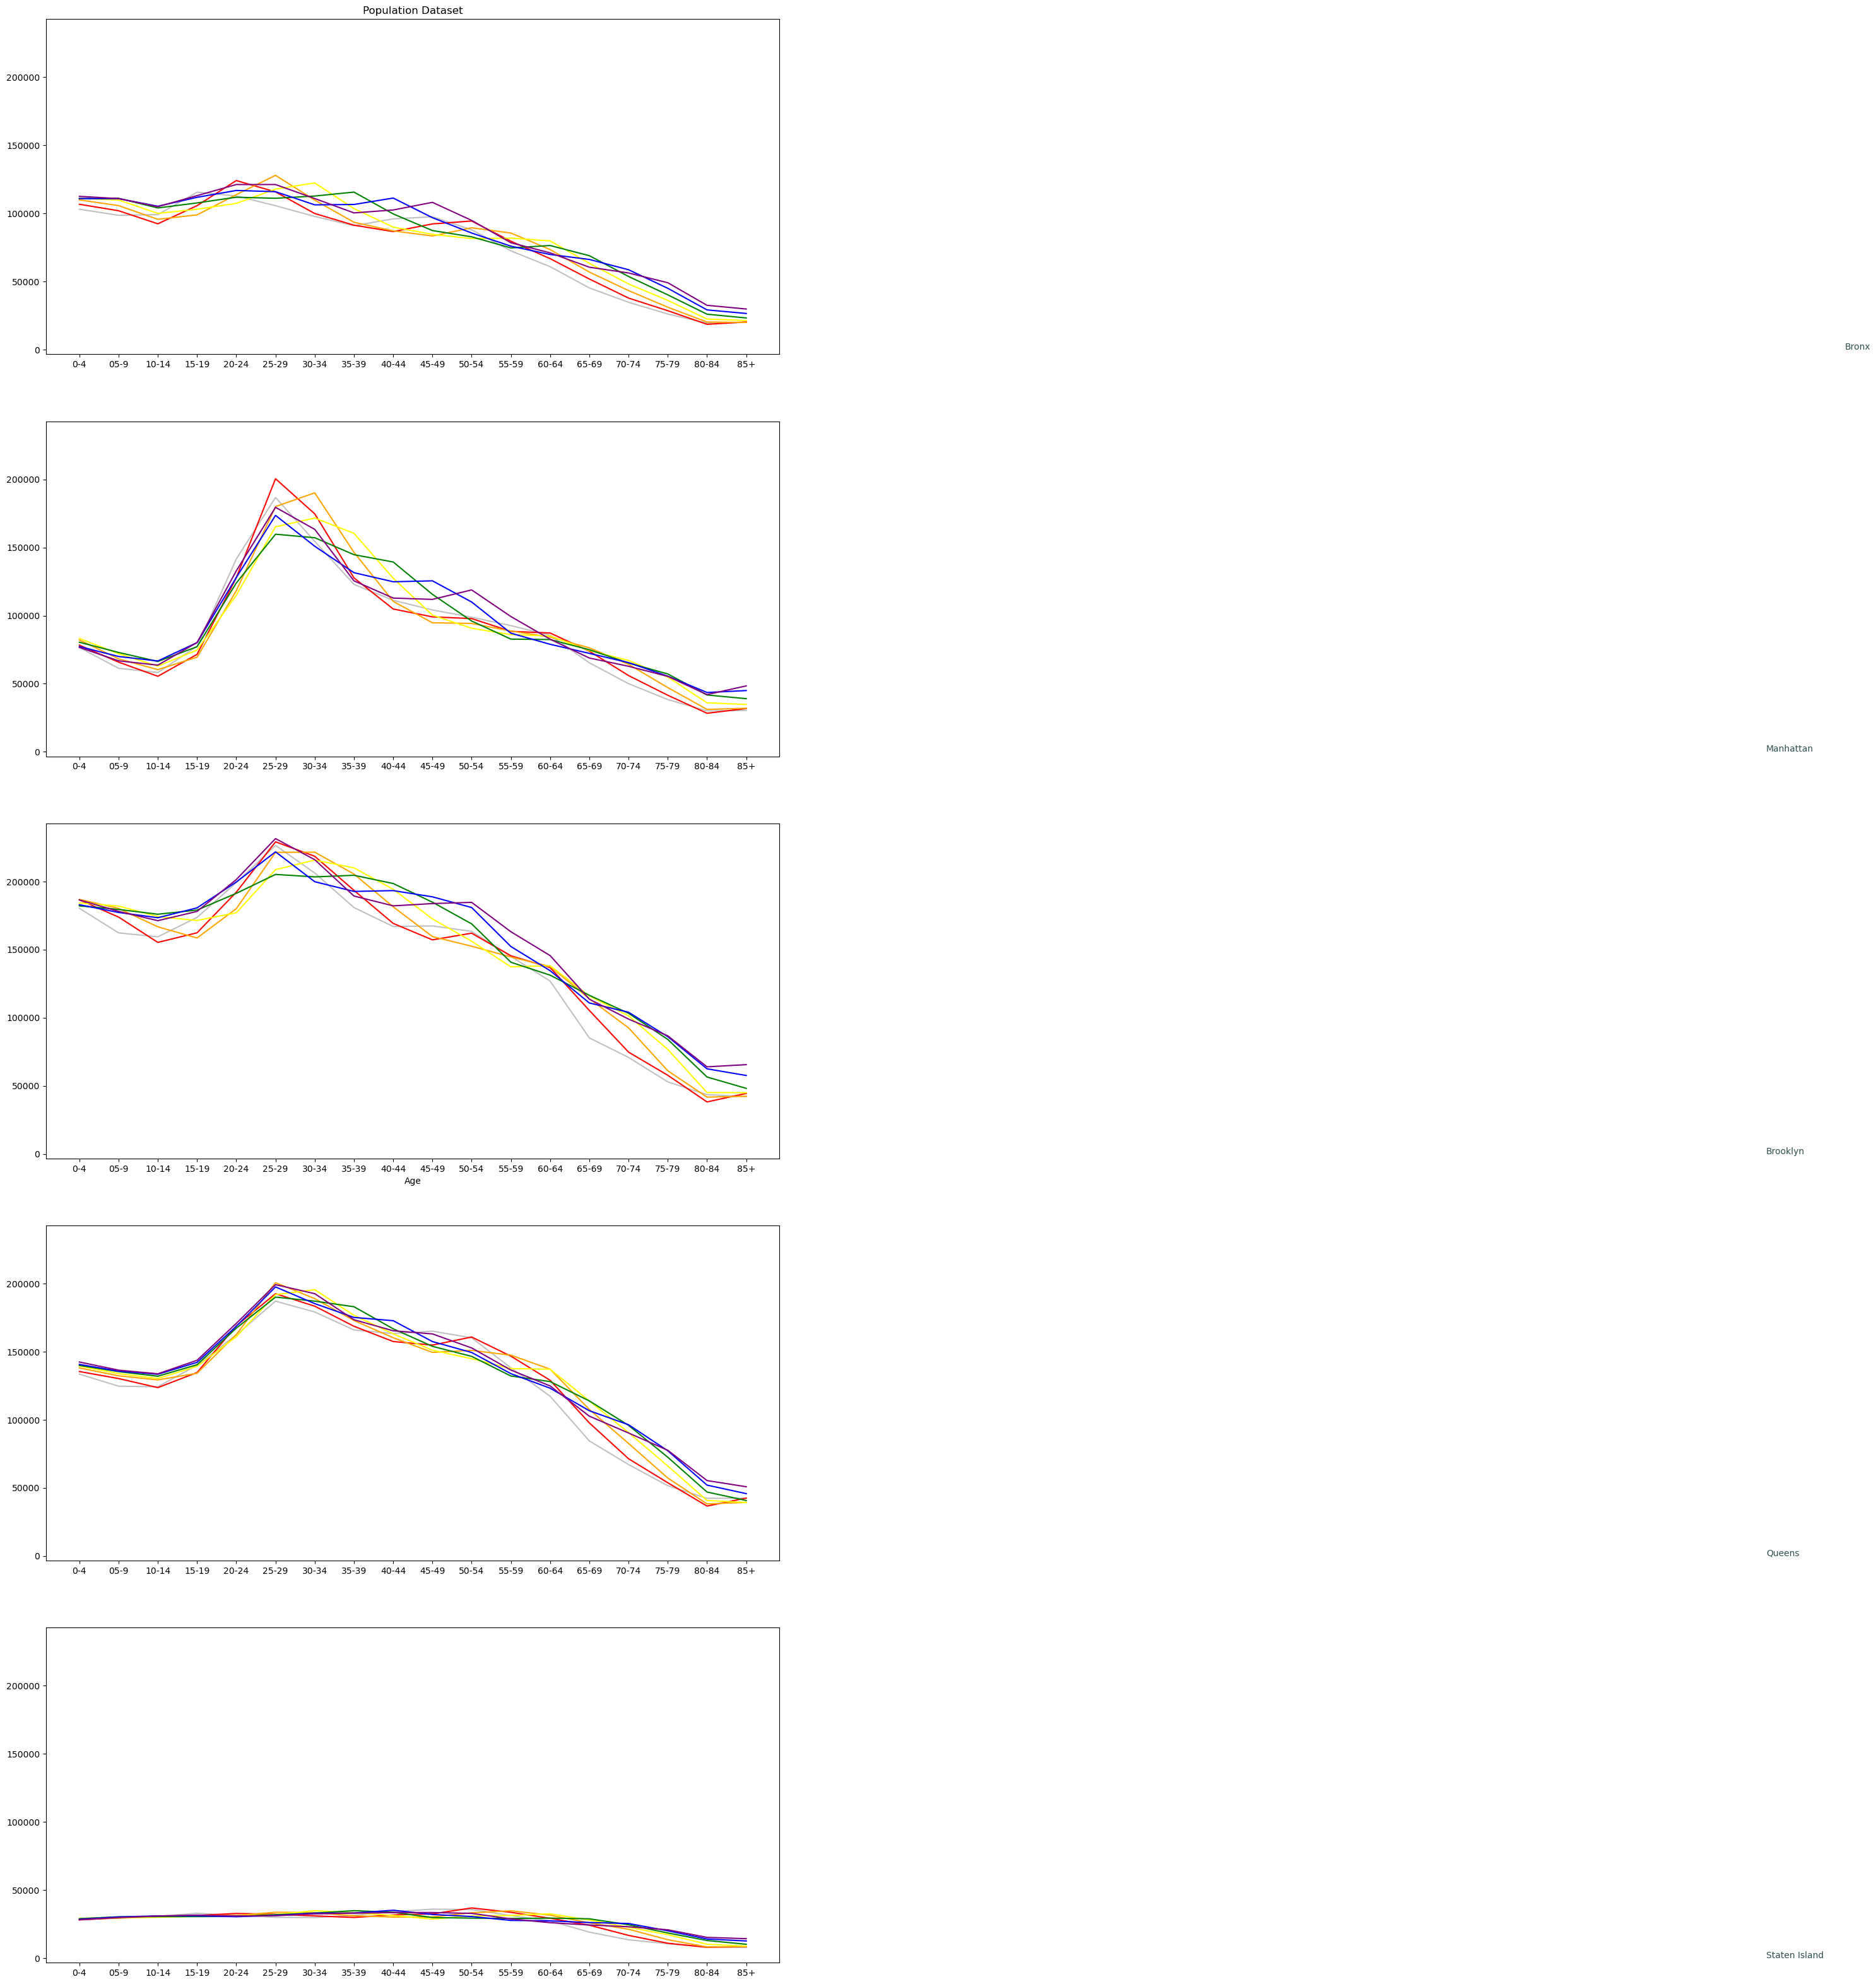

In [299]:
# Define figure and axis
fig, axs = plt.subplots(5,1, figsize = (15,40), sharey = True)


# Set title for axs[0] to use for all subplots 
axs[0].set_title("Population Dataset")

# Set x label for bottom subplot only. 
axs[2].set_xlabel("Age")


# create plot for Bronx
axs[0].plot(Borough_B_clean["Age"], Borough_B_clean["2010"], markersize = 7, label = "Bronx", color = "silver", markeredgecolor = "silver", markeredgewidth = .5)
axs[0].plot(Borough_B_clean["Age"], Borough_B_clean["2015"], markersize = 7, label = "Bronx", color = "red", markeredgecolor = "red", markeredgewidth = .5)
axs[0].plot(Borough_B_clean["Age"], Borough_B_clean["2020"], markersize = 7, label = "Bronx", color = "orange", markeredgecolor = "orange", markeredgewidth = .5)
axs[0].plot(Borough_B_clean["Age"], Borough_B_clean["2025"], markersize = 7, label = "Bronx", color = "yellow", markeredgecolor = "yellow", markeredgewidth = .5)
axs[0].plot(Borough_B_clean["Age"], Borough_B_clean["2030"], markersize = 7, label = "Bronx", color = "green", markeredgecolor = "green", markeredgewidth = .5)
axs[0].plot(Borough_B_clean["Age"], Borough_B_clean["2035"], markersize = 7, label = "Bronx", color = "blue", markeredgecolor = "blue", markeredgewidth = .5)
axs[0].plot(Borough_B_clean["Age"], Borough_B_clean["2040"], markersize = 7, label = "Bronx", color = "purple", markeredgecolor = "purple", markeredgewidth = .5)

# Set as text 
axs[0].text(45, 6, "Bronx", color = "darkslategrey") 

# create plot for Manhattan
axs[1].plot(Borough_M_clean["Age"], Borough_M_clean["2010"], markersize = 7, label = "Manhattan", color = "silver", markeredgecolor = "silver", markeredgewidth = .5)
axs[1].plot(Borough_M_clean["Age"], Borough_M_clean["2015"], markersize = 7, label = "Manhattan", color = "red", markeredgecolor = "red", markeredgewidth = .5)
axs[1].plot(Borough_M_clean["Age"], Borough_M_clean["2020"], markersize = 7, label = "Manhattan", color = "orange", markeredgecolor = "orange", markeredgewidth = .5)
axs[1].plot(Borough_M_clean["Age"], Borough_M_clean["2025"], markersize = 7, label = "Manhattan", color = "yellow", markeredgecolor = "yellow", markeredgewidth = .5)
axs[1].plot(Borough_M_clean["Age"], Borough_M_clean["2030"], markersize = 7, label = "Manhattan", color = "green", markeredgecolor = "green", markeredgewidth = .5)
axs[1].plot(Borough_M_clean["Age"], Borough_M_clean["2035"], markersize = 7, label = "Manhattan", color = "blue", markeredgecolor = "blue", markeredgewidth = .5)
axs[1].plot(Borough_M_clean["Age"], Borough_M_clean["2040"], markersize = 7, label = "Manhattan", color = "purple", markeredgecolor = "purple", markeredgewidth = .5)

axs[1].text(43, 6, "Manhattan", color = "darkslategrey")

# create plot for Brooklyn
axs[2].plot(Borough_K_clean["Age"], Borough_K_clean["2010"], markersize = 7, label = "Brooklyn", color = "silver", markeredgecolor = "silver", markeredgewidth = .5)
axs[2].plot(Borough_K_clean["Age"], Borough_K_clean["2015"], markersize = 7, label = "Brooklyn", color = "red", markeredgecolor = "red", markeredgewidth = .5)
axs[2].plot(Borough_K_clean["Age"], Borough_K_clean["2020"], markersize = 7, label = "Brooklyn", color = "orange", markeredgecolor = "orange", markeredgewidth = .5)
axs[2].plot(Borough_K_clean["Age"], Borough_K_clean["2025"], markersize = 7, label = "Brooklyn", color = "yellow", markeredgecolor = "yellow", markeredgewidth = .5)
axs[2].plot(Borough_K_clean["Age"], Borough_K_clean["2030"], markersize = 7, label = "Brooklyn", color = "green", markeredgecolor = "green", markeredgewidth = .5)
axs[2].plot(Borough_K_clean["Age"], Borough_K_clean["2035"], markersize = 7, label = "Brooklyn", color = "blue", markeredgecolor = "blue", markeredgewidth = .5)
axs[2].plot(Borough_K_clean["Age"], Borough_K_clean["2040"], markersize = 7, label = "Brooklyn", color = "purple", markeredgecolor = "purple", markeredgewidth = .5)

axs[2].text(43, 6, "Brooklyn", color = "darkslategrey")


# create plot for Queens
axs[3].plot(Borough_Q_clean["Age"], Borough_Q_clean["2010"], markersize = 7, label = "Queens", color = "silver", markeredgecolor = "silver", markeredgewidth = .5)
axs[3].plot(Borough_Q_clean["Age"], Borough_Q_clean["2015"], markersize = 7, label = "Queens", color = "red", markeredgecolor = "red", markeredgewidth = .5)
axs[3].plot(Borough_Q_clean["Age"], Borough_Q_clean["2020"], markersize = 7, label = "Queens", color = "orange", markeredgecolor = "orange", markeredgewidth = .5)
axs[3].plot(Borough_Q_clean["Age"], Borough_Q_clean["2025"], markersize = 7, label = "Queens", color = "yellow", markeredgecolor = "yellow", markeredgewidth = .5)
axs[3].plot(Borough_Q_clean["Age"], Borough_Q_clean["2030"], markersize = 7, label = "Queens", color = "green", markeredgecolor = "green", markeredgewidth = .5)
axs[3].plot(Borough_Q_clean["Age"], Borough_Q_clean["2035"], markersize = 7, label = "Queens", color = "blue", markeredgecolor = "blue", markeredgewidth = .5)
axs[3].plot(Borough_Q_clean["Age"], Borough_Q_clean["2040"], markersize = 7, label = "Queens", color = "purple", markeredgecolor = "purple", markeredgewidth = .5)

axs[3].text(43, 6, "Queens", color = "darkslategrey")

# create plot for Queens
axs[4].plot(Borough_S_clean["Age"], Borough_S_clean["2010"], markersize = 7, label = "Staten Island", color = "silver", markeredgecolor = "silver", markeredgewidth = .5)
axs[4].plot(Borough_S_clean["Age"], Borough_S_clean["2015"], markersize = 7, label = "Staten Island", color = "red", markeredgecolor = "red", markeredgewidth = .5)
axs[4].plot(Borough_S_clean["Age"], Borough_S_clean["2020"], markersize = 7, label = "Staten Island", color = "orange", markeredgecolor = "orange", markeredgewidth = .5)
axs[4].plot(Borough_S_clean["Age"], Borough_S_clean["2025"], markersize = 7, label = "Staten Island", color = "yellow", markeredgecolor = "yellow", markeredgewidth = .5)
axs[4].plot(Borough_S_clean["Age"], Borough_S_clean["2030"], markersize = 7, label = "Staten Island", color = "green", markeredgecolor = "green", markeredgewidth = .5)
axs[4].plot(Borough_S_clean["Age"], Borough_S_clean["2035"], markersize = 7, label = "Staten Island", color = "blue", markeredgecolor = "blue", markeredgewidth = .5)
axs[4].plot(Borough_S_clean["Age"], Borough_S_clean["2040"], markersize = 7, label = "Staten Island", color = "purple", markeredgecolor = "purple", markeredgewidth = .5)

axs[4].text(43, 6, "Staten Island", color = "darkslategrey")

# Show plot
plt.show()

Bronx findings: I find it strange that the highest population for 15-19 was for 2010, the earliest year, but for 85+ year olds the popultion seems to grow every five years
Manhattan findings: It seems unusual that there are so many more 25-29 year olds in 2015 than the other, later years, but the 85+ population also seems to realistically grow every five years
Brooklyn findings: Brooklyn has the most young people of all the Boros, and for the most part every five years the population for each age group grows
Queens findings: Queens has the second least varied population between the years with all years very close in population, and starts and finishes with a reasonable increase in population every 5 years
Staten Island findings: Staten Island has the least variance of population between each 5 year interval, the least aggressive peaks and troughs, and the smallest overall population, but does have the every 5th year growth for 85+ year olds
ALL: 2040 has the highest population of all places for 85+ year olds; every area besides staten island has a peak of 25-29 year olds; staten islands population is much smaller in comparison to the other areas

<h4><u> Drug and alcohol-related arrests per age group compared to age group population</u></h4>

Choose <b><i>two age groups</i></b> from the NYC Population data in which drug and alcohol-related arrests occur for and <b><i>one of the two boroughs</i></b>.  Compare the number of drug and alcohol-related arrests for the age groups you've selected to the total population of those age groups from the borough you selected. 

Perform any analytical steps you may need to complete the criteria above.  Make sure to include at least one plot of your choice in this section.
  

In [300]:
filter_Brooklyn = Projected_pop_by_age_df["Borough"] == "Brooklyn"
Brooklyn_pop_by_age = Projected_pop_by_age_df.where(filter_Brooklyn)
Brooklyn_pop_by_age = Brooklyn_pop_by_age[Brooklyn_pop_by_age['Age'] != 'Total']
Brooklyn_pop_by_age['Age'] = Brooklyn_pop_by_age['Age'].replace(['5-9'],'05-9')
Brooklyn_pop_by_age_clean_df = Brooklyn_pop_by_age.dropna()
Brooklyn_pop_by_age_clean_df = Brooklyn_pop_by_age_clean_df.sort_values("Age")
print(Brooklyn_pop_by_age_clean_df.head(20))

      Borough    Age      2010      2015      2020      2025      2030  \
34   Brooklyn    0-4  180353.0  186547.0  186886.0  184273.0  182152.0   
105  Brooklyn   05-9  162302.0  173890.0  180252.0  182013.0  179508.0   
112  Brooklyn  10-14  159404.0  155314.0  166761.0  174242.0  175992.0   
35   Brooklyn  15-19  173672.0  162365.0  158561.0  171398.0  179052.0   
36   Brooklyn  20-24  199153.0  192162.0  180072.0  177078.0  191335.0   
37   Brooklyn  25-29  226516.0  229152.0  221421.0  208706.0  205220.0   
38   Brooklyn  30-34  206266.0  218546.0  221544.0  215764.0  203416.0   
39   Brooklyn  35-39  180888.0  193533.0  205525.0  210019.0  204593.0   
40   Brooklyn  40-44  166998.0  169246.0  181452.0  194294.0  198551.0   
41   Brooklyn  45-49  167402.0  157171.0  159615.0  172580.0  184841.0   
42   Brooklyn  50-54  163403.0  162090.0  152501.0  156182.0  168925.0   
43   Brooklyn  55-59  145029.0  145484.0  144647.0  137394.0  140742.0   
44   Brooklyn  60-64  126915.0  136873

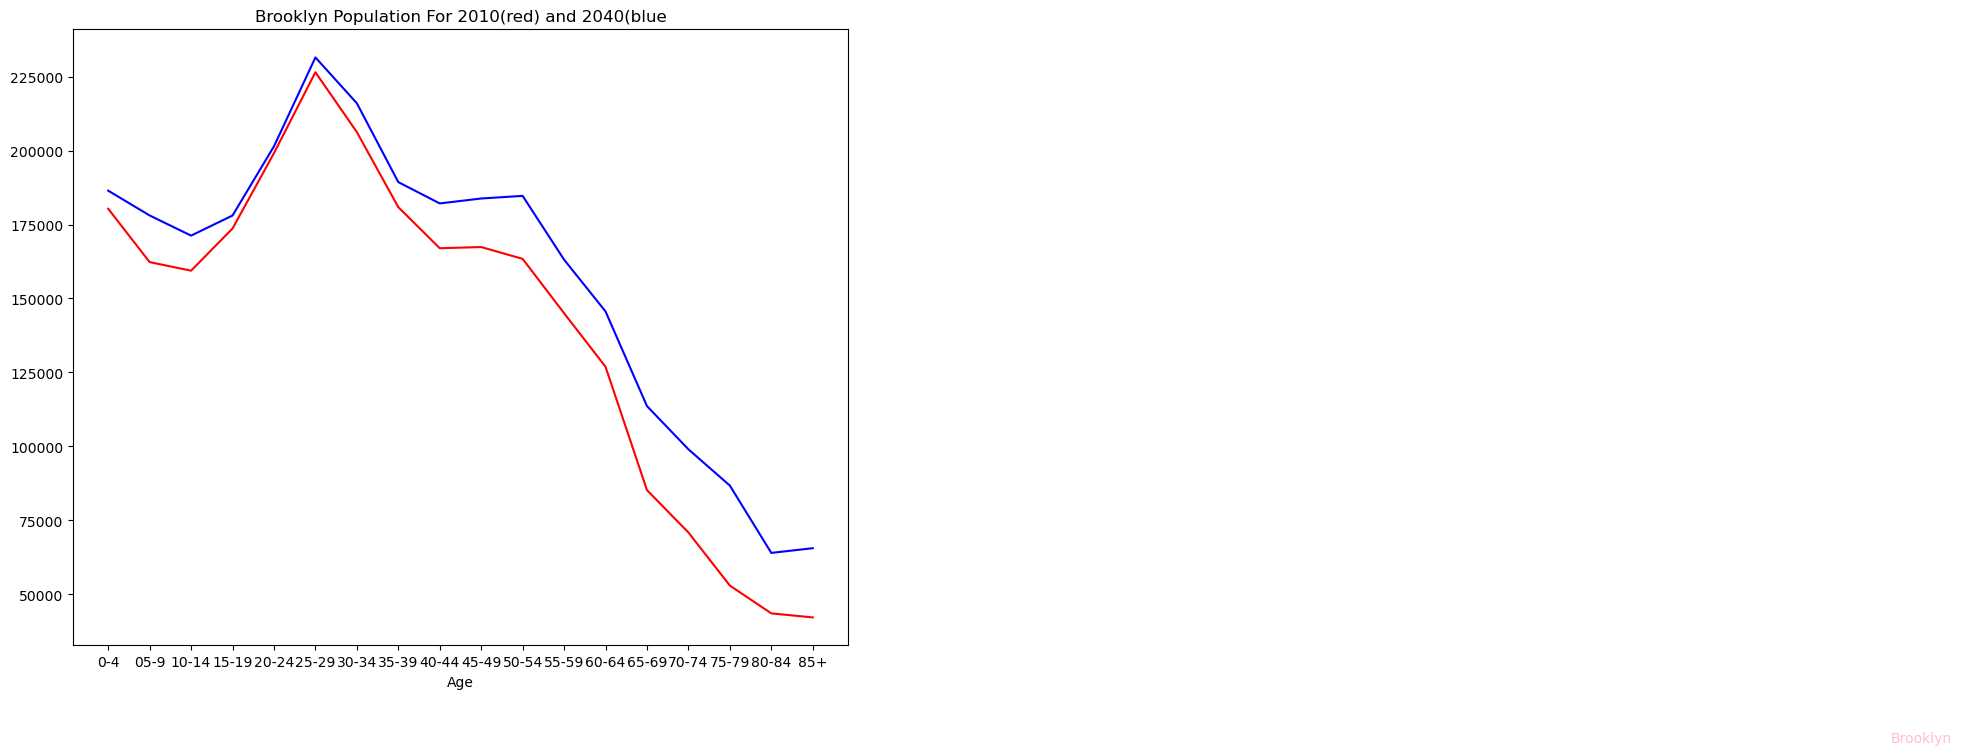

In [301]:
# Define figure and axis
fig, axs = plt.subplots(1,1, figsize = (10,8), sharey = True)


# Set title for axs[0] to use for all subplots 
axs.set_title("Brooklyn Population For 2010(red) and 2040(blue")

# Set x label for bottom subplot only. 
axs.set_xlabel("Age")
axs.set_ylabel("")

# create plot for Brooklyn
axs.plot(Brooklyn_pop_by_age_clean_df["Age"], Brooklyn_pop_by_age_clean_df["2010"], markersize = 7, label = "Brooklyn", color = "red", markeredgecolor = "red", markeredgewidth = .5)
axs.plot(Brooklyn_pop_by_age_clean_df["Age"], Brooklyn_pop_by_age_clean_df["2040"], markersize = 7, label = "Brooklyn", color = "blue", markeredgecolor = "blue", markeredgewidth = .5)

axs.text(43, 6, "Brooklyn", color = "pink")

# Show plot
plt.show()

<h4><u>Analysis Results</u></h4>

Using the results of your above analysis, write a short summary below answering the research question: 

<b><i>How do the arrest demographics for drug and alcohol-related offenses compare to the corresponding population demographics for each borough?</i></b>

Brooklyn has the largest population of the areas, so it is reasonable to infer that the reason Brooklyn has the second highest drug arrests and 
third highest driving arrests is because there are more people there to be arrested and more people in general so there are more likely more criminals 

The same point for staten island, as Staten Island has a much smaller population, the number of arrests for driving impaired and dangerous drugs is the smallest because
there are less people to arrest and less criminals in a small population, so compared to other areas it has the least arrests, but this doesnt necessarily mean its the safest, its just the smallest

Queens has the most driving arrests, but this could just be because driving is more accessible in this area

All areas have more drug arrests than impaired driving arrests, possibly because driving is not as accessible in New York

